<div id="qr" style="display:inline-block; align:left;vertical-align: middle;" >
  <h2>Website Reviews Sentiment Analysis</h2>
    <h4>Scraping GAP, Old Navy and Competitor Macy's product reviews</h4>
</div>
<div style="display:inline-block;vertical-align: middle;float:right;">
  <img style="float: right;" src='https://cdn.freebiesupply.com/logos/large/2x/gap-logo-png-transparent.png' width='100'>
</div>

### Driving creativity through data 
<p>Website Reviews: This notebook contains the sentiment analysis done on the reviews obtained from GAP, Old Navy and Macy's website.</p>
<p>Macy has been identified as a competitor and we're trying to identify the sentiment and some trending words from their website.</p>
<p>We have limited our analysis to jeans category under Men's section to pull a sample dataset and provide an insight on the kind of analysis that can be done on a larger dataset.</p>

<h2> Table of Contents</h2>
<ol>
    <li><a href='#Import-Libraries'>Importing Libraries</a></li>
    <li><a href='#Scraping-websites'>Scraping Websites</a></li>
    <li><a href='#Sentiment-analysis'>Sentiment Analysis</a></li>
    <li><a href='#Word-Cloud'>Word Cloud</a></li>
</ol>

## Import Libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Scraping websites

### Old Navy website scraping

In [2]:
url = "https://oldnavy.gap.com/browse/category.do?cid=5199&&nav=meganav%3AMen%3AShop%20Men%E2%80%99s%20Categories%3AJeans#pageId=0&department=75"
driver = webdriver.Chrome()
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

html = driver.page_source
soup = BeautifulSoup(html)

res = soup.find_all('div',attrs={'class':'product-card category-page-zu5l9z'})

productid = []
star_rating = []
review_header = []
review_desc = []

d = {}

for i in range(len(res)):
    temp_review = []
    temp_desc = []
    temp_star =[]
    temp_pid=[]
    
    print(res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0])
    if i <10:
        pid = res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0]

        product_url = 'https://oldnavy.gap.com/browse/product.do?pid={}&cid=5199&pcid=5199&vid=1&nav=meganav%3AMen%3AShop%20Men%E2%80%99s%20Categories%3AJeans&cpos=0&cexp=2926&kcid=CategoryIDs%3D5199&cvar=26331&ctype=Listing&cpid=res23092405356742190363231#pdp-page-content'.format(pid)

        driver = webdriver.Chrome()
        driver.get(product_url)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        time.sleep(15)
        
        html = driver.page_source
        soup = BeautifulSoup(html)
      
        
        review = soup.find_all('h2',attrs={'class':'pr-rd-review-headline'})
        if len(review)>0:
            for r in range(len(review)):
                temp_review.append(review[r].text)
                temp_pid.append(pid)
            
        desc = soup.find_all('p',attrs={'class':'pr-rd-description-text'})    
        if len(desc)>0:
            for r in range(len(desc)):
                temp_desc.append(desc[r].text)

                
        productid.append(temp_pid)
        star_rating.append(temp_star)
        review_header.append(temp_review)
        review_desc.append(temp_desc)

        driver.close()
        driver.quit()
    else:
        break

productid = [ids for ids in productid if ids]
review_header = [review for review in review_header if review]
review_desc = [review for review in review_desc if review]


# Create DataFrames for both product_id and star_rating
df_product_id = pd.DataFrame({'product_id': [item for sublist in productid for item in sublist]})
df_review_header = pd.DataFrame({'review_header': [item for sublist in review_header for item in sublist]})
df_review_desc = pd.DataFrame({'review_desc': [item for sublist in review_desc for item in sublist]})

# Concatenate the DataFrames horizontally
on_result_df = pd.concat([df_product_id, df_review_header,df_review_desc], axis=1)
on_result_df 

752283002
220383022
749149002
610082002
220063022
220063052
723849002
673925002


,product_id,review_header,review_desc
0,752283002,Love it,Lovely
1,752283002,Comfy,Very comfy for walking.
2,752283002,big fit,I Like the color and the stretch but the are w...
3,752283002,Comfort,Just fits perfectly. Soft and comfortable to wear
4,752283002,Great jeans,Nice fit.
...,...,...,...
75,673925002,Nice fit,"Good overall fit, it is hard to find jeans tha..."
76,673925002,Love em,I love the fit and look of the denim.
77,673925002,Great clothes at a good price!,Wonderful!
78,673925002,Son's new favorite jeans,"Great fit, look great"


### Gap website scraping

In [3]:
url = "https://oldnavy.gap.com/browse/category.do?cid=5199&&nav=meganav%3AMen%3AShop%20Men%E2%80%99s%20Categories%3AJeans#pageId=0&department=75"
driver = webdriver.Chrome()
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

html = driver.page_source
soup = BeautifulSoup(html)

res = soup.find_all('div',attrs={'class':'product-card category-page-zu5l9z'})

productid = []
star_rating = []
review_header = []
review_desc = []

d = {}

for i in range(len(res)):
    temp_review = []
    temp_desc = []
    temp_star =[]
    temp_pid=[]
    
    print(res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0])
    if i <10:
        pid = res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0]

        product_url = 'https://oldnavy.gap.com/browse/product.do?pid={}&cid=5199&pcid=5199&vid=1&nav=meganav%3AMen%3AShop%20Men%E2%80%99s%20Categories%3AJeans&cpos=0&cexp=2926&kcid=CategoryIDs%3D5199&cvar=26331&ctype=Listing&cpid=res23092405356742190363231#pdp-page-content'.format(pid)

        driver = webdriver.Chrome()
        driver.get(product_url)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        time.sleep(15)
        
        html = driver.page_source
        soup = BeautifulSoup(html)

    
        review = soup.find_all('h2',attrs={'class':'pr-rd-review-headline'})
        if len(review)>0:
            for r in range(len(review)):
                temp_review.append(review[r].text)
                temp_pid.append(pid)
            
        desc = soup.find_all('p',attrs={'class':'pr-rd-description-text'})    
        if len(desc)>0:
            for r in range(len(desc)):
                temp_desc.append(desc[r].text)

                
        productid.append(temp_pid)
        star_rating.append(temp_star)
        review_header.append(temp_review)
        review_desc.append(temp_desc)

        driver.close()
        driver.quit()
    else:
        break

productid = [ids for ids in productid if ids]
review_header = [review for review in review_header if review]
review_desc = [review for review in review_desc if review]


# Create DataFrames for both product_id and star_rating
df_product_id = pd.DataFrame({'product_id': [item for sublist in productid for item in sublist]})
df_review_header = pd.DataFrame({'review_header': [item for sublist in review_header for item in sublist]})
df_review_desc = pd.DataFrame({'review_desc': [item for sublist in review_desc for item in sublist]})

# Concatenate the DataFrames horizontally
gap_result_df = pd.concat([df_product_id, df_review_header,df_review_desc], axis=1)
gap_result_df 

752283002
220383022
749149002
610082002
220063022
220063052
723849002
673925002


,product_id,review_header,review_desc
0,752283002,Love it,Lovely
1,752283002,Comfy,Very comfy for walking.
2,752283002,big fit,I Like the color and the stretch but the are w...
3,752283002,Comfort,Just fits perfectly. Soft and comfortable to wear
4,752283002,Great jeans,Nice fit.
...,...,...,...
75,673925002,Nice fit,"Good overall fit, it is hard to find jeans tha..."
76,673925002,Love em,I love the fit and look of the denim.
77,673925002,Great clothes at a good price!,Wonderful!
78,673925002,Son's new favorite jeans,"Great fit, look great"


### Macy's website scraping

In [4]:
url = "https://www.macys.com/shop/mens-clothing/mens-jeans?id=11221&cm_sp=us_hdr-_-men-_-11221_jeans_COL1"
driver = webdriver.Chrome()
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

html = driver.page_source
soup = BeautifulSoup(html)
res = soup.find_all('div',attrs={'class':'productDescription'})

res

for i in range(len(res)):
    print(res[i].findChildren("a")[0]['href'].split('?ID=')[1].split('"')[0])

res

productid = []
star_rating = []
review_header = []
review_desc = []

d = {}

for i in range(len(res)):
    temp_review = []
    temp_desc = []
    
    print(res[i].findChildren("a")[0]['href'].split('?ID=')[1].split('"')[0])
    if i < 3:
        pid = res[i].findChildren("a")[0]['href'].split('?ID=')[1].split('"')[0]
        
        product_url = 'https://www.macys.com/shop/product/levis-mens-511-slim-fit-jeans?ID={}&swatchColor=Rinsed%20Playa%20-%20Waterless%20Blue'.format(pid)

        driver = webdriver.Chrome()
        driver.get(product_url)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        time.sleep(15)
        
        html = driver.page_source
        soup = BeautifulSoup(html)

        review = soup.find_all('div',attrs={'class':'cell small-12 i-rev-title c-break-word'})
        if len(review)>0:
            for r in range(len(review)):
                temp_review.append(review[r].text)
            
        
#         review = soup.find_all('h2',attrs={'class':'pr-rd-review-headline'})
#         if len(review)>0:
#             for r in range(len(review)):
#                 temp_review.append(review[r].text)
            
        desc = soup.find_all('p',attrs={'class':'r-text margin-bottom-xs margin-top-xxs'})    
        if len(desc)>0:
            for r in range(len(desc)):
                temp_desc.append(desc[r].text)

                
#         productid.append(pid)
#         star_rating.append(star)
        review_header.append(temp_review)
        review_desc.append(temp_desc)

        driver.close()
        driver.quit()
    else:
        break



review_header = [review for review in review_header if review]
review_desc = [review for review in review_desc if review]


# Create DataFrames for both product_id and star_rating

df_review_header = pd.DataFrame({'review_header': [item for sublist in review_header for item in sublist]})
df_review_desc = pd.DataFrame({'review_desc': [item for sublist in review_desc for item in sublist]})

# Concatenate the DataFrames horizontally
macys_result_df = pd.concat([ df_review_header,df_review_desc], axis=1)
macys_result_df

1103208
1431681
9617175
14462048
14462054
14630639
11381194
612374
10676400
1656539
613981
7205440
14625614
10514017
8790026
8790026
14663714
16183605
12060417
9452627
2219302
1450667
614000
12441300&tdp=cm_app~zMCOM-NAVAPP~xcm_zone~zBROWSE_ZONE_C~xcm_choiceId~zcidMDKMZZ-4c35ed19-0194-48ec-a4cf-14c3f555f0ff%40HC3%40Our%2Btop%2Bdeals%2B%2526%2Bpicks%2411221%2412441300~xcm_pos~zPos1~xcm_srcCatID~z11221
11380185&tdp=cm_app~zMCOM-NAVAPP~xcm_zone~zBROWSE_ZONE_C~xcm_choiceId~zcidMDKMZZ-4c35ed19-0194-48ec-a4cf-14c3f555f0ff%40HC3%40Our%2Btop%2Bdeals%2B%2526%2Bpicks%2411221%2411380185~xcm_pos~zPos2~xcm_srcCatID~z11221
10903942&tdp=cm_app~zMCOM-NAVAPP~xcm_zone~zBROWSE_ZONE_C~xcm_choiceId~zcidMDKMZZ-4c35ed19-0194-48ec-a4cf-14c3f555f0ff%40HC3%40Our%2Btop%2Bdeals%2B%2526%2Bpicks%2411221%2410903942~xcm_pos~zPos3~xcm_srcCatID~z11221
13329903&tdp=cm_app~zMCOM-NAVAPP~xcm_zone~zBROWSE_ZONE_C~xcm_choiceId~zcidMDKMZZ-4c35ed19-0194-48ec-a4cf-14c3f555f0ff%40HC3%40Our%2Btop%2Bdeals%2B%2526%2Bpicks%2411221%24

,review_header,review_desc
0,Perfect fit,Perfect fit
1,Confortable!!,The jeans is wonderful!!
2,Would buy again,Perfect fit and good quality material.
3,"Levi's jeans, thinner and cheaper than ever.",Husband and I like the fit but the material is...
4,Levi's men jeans,Had to return it. Did not fit well for my 16y...
5,Like a glove,Great fitting jeans.
6,Great Quality & Fit,These have been my absolute favorite jean over...
7,Saggy Bottom Britches,They’re ok. I now realize I’m not into the “st...
8,Lucky For Sure!,My son loves the low rise fit of Lucky brand. ...
9,"The fit is not good for a ""booty-less"" body type.",Returned these jeans. Purchased 5 different br...


## Sentiment analysis

In [5]:
nltk.download("vader_lexicon") # Replace with your actual data source
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akanksha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
# Categorizing according to the score

def categorize_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"



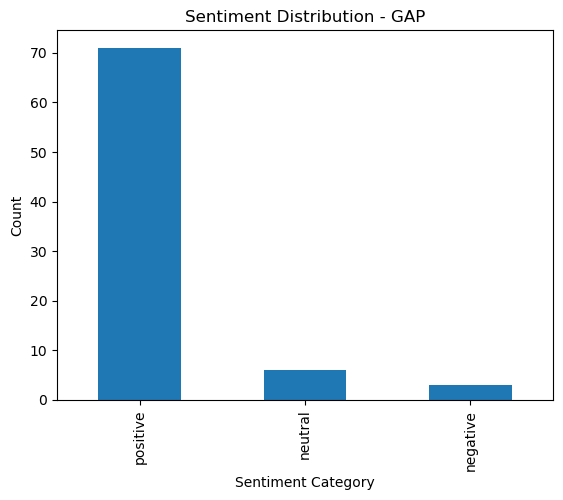

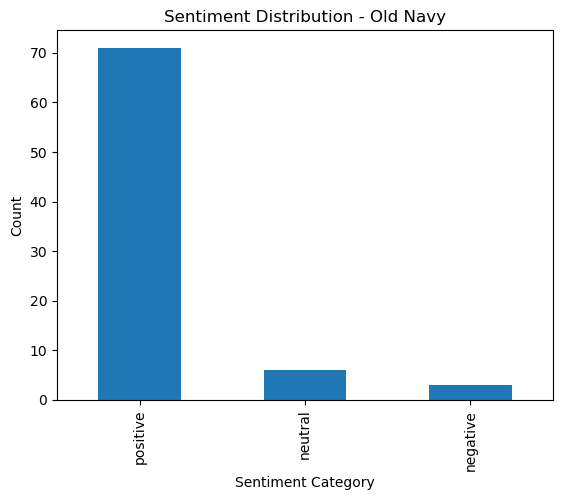

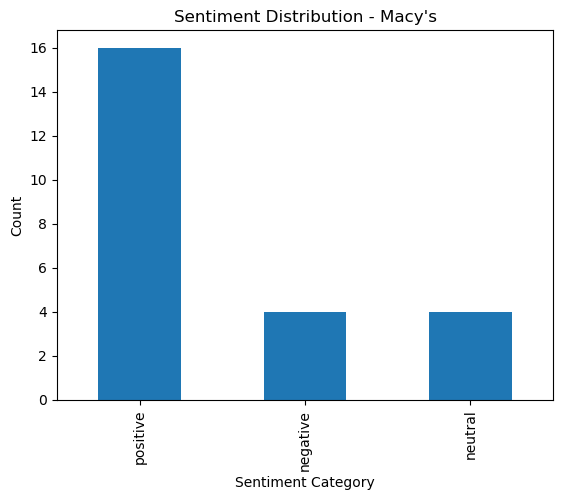

In [9]:
for df, name in zip([gap_result_df, on_result_df, macys_result_df], ['GAP', 'Old Navy', "Macy's"]):
    sid = SentimentIntensityAnalyzer()

    df["sentiment"] = df["review_desc"].apply(lambda x: sid.polarity_scores(x)["compound"])
    df["sentiment_category"] = df["sentiment"].apply(categorize_sentiment)

    # Plot sentiment distribution
    sentiment_counts = df["sentiment_category"].value_counts()
    sentiment_counts.plot(kind="bar", title=f"Sentiment Distribution - {name}")
    plt.xlabel("Sentiment Category")
    plt.ylabel("Count")
    plt.show()

## Word Cloud 

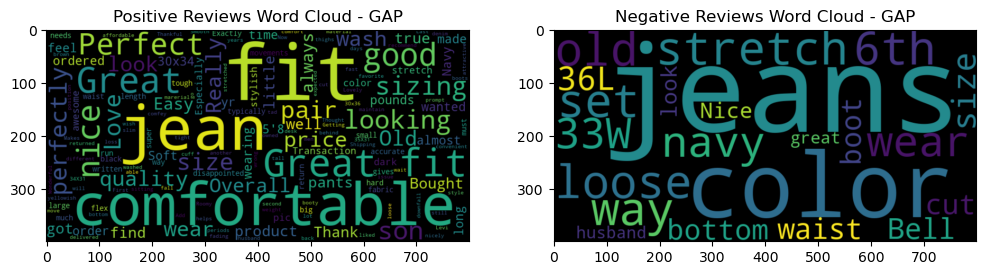

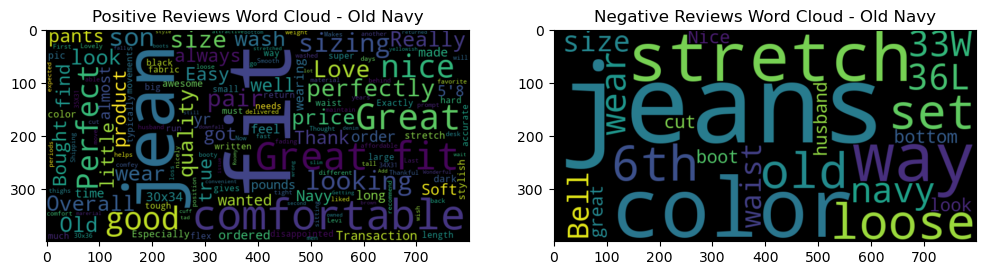

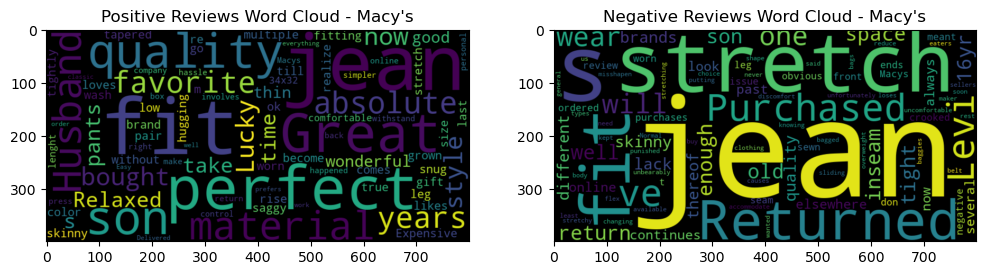

In [10]:
for df, name in zip([gap_result_df, on_result_df, macys_result_df], ['GAP', 'Old Navy', "Macy's"]):
    sid = SentimentIntensityAnalyzer()

    df["sentiment"] = df["review_desc"].apply(lambda x: sid.polarity_scores(x)["compound"])
    df["sentiment_category"] = df["sentiment"].apply(categorize_sentiment)

    positive_reviews = " ".join(df[df["sentiment_category"] == "positive"]["review_desc"])
    negative_reviews = " ".join(df[df["sentiment_category"] == "negative"]["review_desc"])

    if len(positive_reviews) > 0:
        wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(wordcloud_positive, interpolation="bilinear")
        plt.title(f"Positive Reviews Word Cloud - {name}")

    if len(negative_reviews) > 0:
        wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews)

        plt.subplot(1, 2, 2)
        plt.imshow(wordcloud_negative, interpolation="bilinear")
        plt.title(f"Negative Reviews Word Cloud - {name}")

    plt.show()

<h3> As seen from above, words like "loose" appear a lot on the negative wordcloud for both GAP and Old Navy. This might indicate that work needs to be done on their fit.</h3>

### By scraping more reviews from websites, we can perform a similar analysis to get a clear picture of what the customers are talking about and use those in driving creativity using data.